***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = {
    "A": (19700, float("inf")),
    "B": (11820, 19700),
    "C": (3940, 11820),
    "D": (1576, 3940),
    "E": (0, 1576)
}


### 2º Definir os labels das classes

In [5]:
labels = ['E (≤ 2 SM)', 'D (2–5 SM)', 'C (5–15 SM)', 'B (15–25 SM)', 'A (> 25 SM)']


### 3º Construir a coluna de frequências

In [6]:
sm = 788

# Intervalos em reais
bins = [0, 2*sm, 5*sm, 15*sm, 25*sm, float('inf')]
labels = ['E (≤ 2 SM)', 'D (2–5 SM)', 'C (5–15 SM)', 'B (15–25 SM)', 'A (> 25 SM)']

# Cria a nova coluna com a classe de renda
df['Classe_Renda'] = pd.cut(df['Renda'], bins=bins, labels=labels, right=True)

# Frequência absoluta
frequencia = df['Classe_Renda'].value_counts().sort_index()

### 4º Construir a coluna de percentuais

In [7]:
percentual = (frequencia / frequencia.sum()) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
tabela = pd.DataFrame({
    'Frequência': frequencia,
    'Percentual (%)': percentual.round(2)
})

tabela.index.name = 'Classe de Renda'
tabela.reset_index(inplace=True)


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

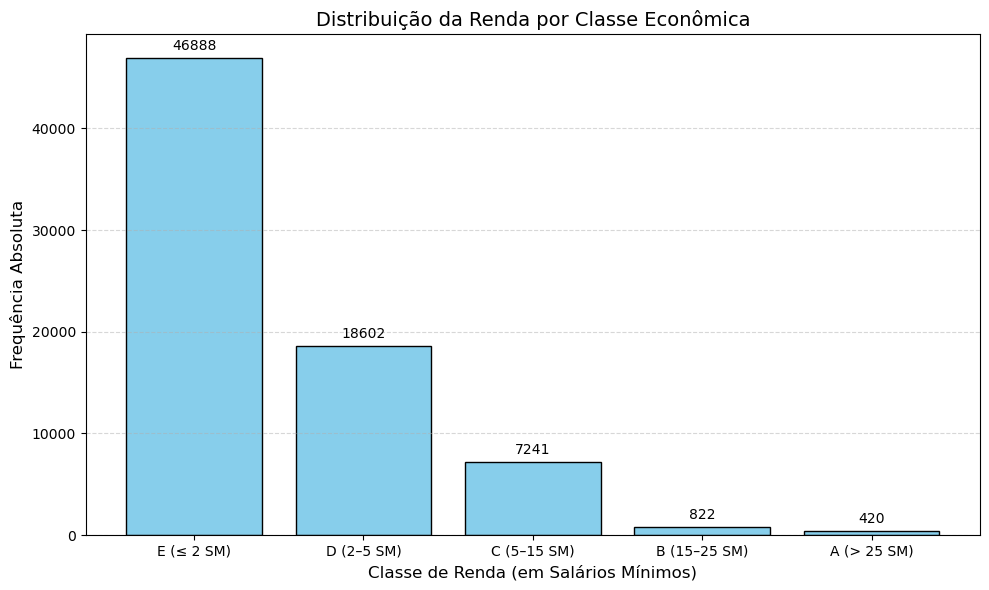

In [11]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(tabela['Classe de Renda'], tabela['Frequência'], color='skyblue', edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição da Renda por Classe Econômica', fontsize=14)
plt.xlabel('Classe de Renda (em Salários Mínimos)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

# Mostrar os valores acima das barras
for i, freq in enumerate(tabela['Frequência']):
    plt.text(i, freq + max(tabela['Frequência']) * 0.01, str(freq), ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

> ### Conclusões

A análise da renda por faixas de salário mínimo evidencia uma forte concentração da população nas classes de menor renda. Isso revela desigualdade econômica significativa, onde a maior parte vive com até 5 salários mínimos, enquanto apenas uma pequena parcela alcança rendas mais elevadas. Essa informação é crucial para subsidiar políticas públicas voltadas à redução da desigualdade e promoção da equidade social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

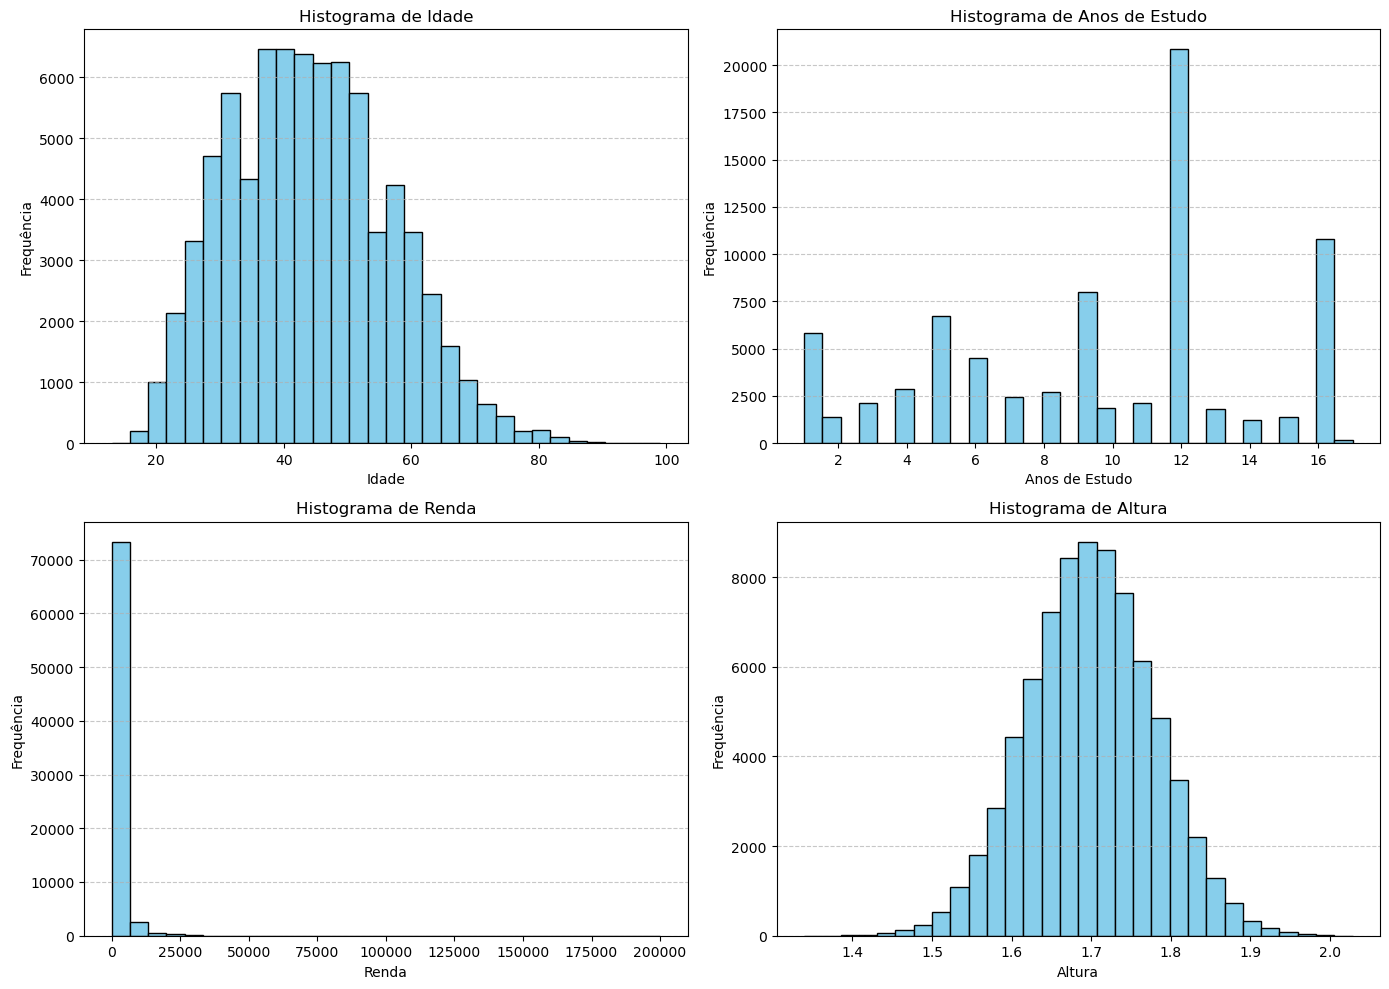

In [12]:
# Lista de variáveis quantitativas
variaveis_quantitativas = ['Idade', 'Anos de Estudo', 'Renda', 'Altura']

# Tamanho da figura para todos os histogramas
plt.figure(figsize=(14, 10))

# Laço para criar subplots
for i, var in enumerate(variaveis_quantitativas, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


> ### Conclusões

1. Histograma de Idade
A distribuição da idade tem forma aproximadamente normal (simétrica), concentrada entre os 30 e 60 anos.
Poucos jovens (< 20 anos) e poucos idosos (> 70 anos) na amostra.
Conclusão: A maioria da população está em idade adulta, provavelmente ativa no mercado de trabalho.

2. Histograma de Anos de Estudo
Distribuição discreta com picos visíveis em:
4 anos (fim do ensino fundamental I),
8 a 9 anos (fim do fundamental II),
11 a 12 anos (ensino médio completo),
15 a 16 anos (nível superior completo).
Conclusão: Há marcos educacionais bem definidos na população. A maior parte tem até o ensino médio ou superior.

3. Histograma de Renda
Altamente assimétrica à direita (distribuição enviesada).
Maioria com rendimentos baixos (até R$ 2.000), poucos com rendas muito altas.
A cauda se estende até valores extremos (> R$ 200.000), indicando outliers.
Conclusão: Forte concentração de renda nas faixas mais baixas. A desigualdade de renda é marcante.

4. Histograma de Altura
Distribuição quase normal (gaussiana), centrada em torno de 1,70 a 1,75 metros.
Poucos casos em extremos como <1,60 m ou >1,85 m.
Conclusão: Altura segue uma distribuição típica de uma população geral adulta, sem assimetrias visíveis.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

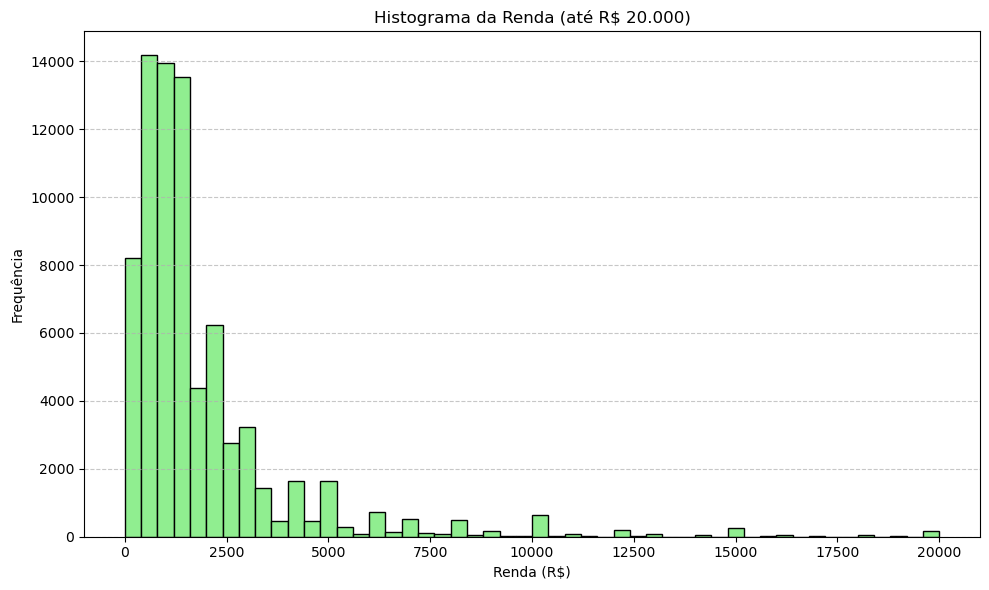

In [13]:
renda_filtrada = df[df['Renda'] <= 20000]['Renda']

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(renda_filtrada, bins=50, color='lightgreen', edgecolor='black')
plt.title('Histograma da Renda (até R$ 20.000)')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
# Dicionários fornecidos
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

# Tabela de frequências absolutas
freq_abs = pd.crosstab(df['Sexo'], df['Cor'])

# Renomeando linhas e colunas
freq_abs.rename(index=sexo, columns=cor, inplace=True)

# Tabela de percentuais (linha = sexo)
freq_perc = pd.crosstab(df['Sexo'], df['Cor'], normalize='index') * 100
freq_perc.rename(index=sexo, columns=cor, inplace=True)

# Exibir tabelas
print("Frequência Absoluta:")
print(freq_abs)
print("\nPercentual por Sexo:")
print(freq_perc.round(2))


Frequência Absoluta:
Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862

Percentual por Sexo:
Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino      0.48   41.68  10.33     0.44  47.07
Feminino       0.43   40.78  12.25     0.50  46.04


> ### Conclusões

Predominância da cor Parda e Branca em ambos os sexos.

A cor Parda é a mais comum, seguida pela Branca.

A distribuição de cores é semelhante entre homens e mulheres.

Pequenas variações nas proporções percentuais.

A cor Preta aparece com mais frequência nas mulheres do que nos homens (porcentualmente).

Pode indicar variações sociais ou regionais no perfil demográfico.

As categorias Indígena, Amarela e Sem declaração representam minorias na amostra.



## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
# Média
media = df['Renda'].mean()

### Obtenha a mediana

In [20]:
# Mediana
mediana = df['Renda'].median()

### Obtenha a moda

In [21]:
# Moda
moda = df['Renda'].mode().values[0]

### Obtenha o desvio médio absoluto

In [24]:
# Desvio médio absoluto
dma = (df['Renda'] - df['Renda'].mean()).abs().mean()

### Obtenha a variância

In [25]:
# Variância
variancia = df['Renda'].var()

### Obtenha o desvio-padrão

In [26]:
# Desvio padrão
desvio_padrao = df['Renda'].std()

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
# Exibindo os resultados
print(f"Média: R$ {media:.2f}")
print(f"Mediana: R$ {mediana:.2f}")
print(f"Moda: R$ {moda:.2f}")
print(f"Desvio Médio Absoluto: R$ {dma:.2f}")
print(f"Variância: R$ {variancia:.2f}")
print(f"Desvio Padrão: R$ {desvio_padrao:.2f}")

Média: R$ 2000.38
Mediana: R$ 1200.00
Moda: R$ 788.00
Desvio Médio Absoluto: R$ 1526.50
Variância: R$ 11044906.01
Desvio Padrão: R$ 3323.39


> ### Conclusões

Os dados indicam que existe uma desigualdade significativa na distribuição de renda, tanto entre as raças/cor quanto entre os sexos:

Homens brancos possuem, em média, rendas mais altas que os demais grupos, enquanto indígenas e pretos (especialmente homens) apresentam médias e medianas menores, o que sugere desigualdade socioeconômica entre os grupos raciais.

Mulheres indígenas apresentam média de renda relativamente alta comparado a outros grupos femininos, mas ainda inferior aos homens.

A distribuição é assimétrica e desigual, com muitos indivíduos ganhando valores baixos e poucos com rendas muito altas, o que amplia a média e aumenta a variabilidade.

Essa disparidade sugere que políticas públicas específicas poderiam focar em reduzir a desigualdade racial e de gênero na renda, para promover mais equidade.


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [29]:
# Dicionários para nomear os valores
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {
    0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela',
    8: 'Parda', 9: 'Sem declaração'
}

# Cruzamento usando crosstab com múltiplas funções
renda_por_grupo = pd.crosstab(
    df['Sexo'], df['Cor'],
    values=df['Renda'],
    aggfunc={'mean', 'median', 'max'}
)

# Renomeando índices e colunas
renda_por_grupo.rename(index=sexo, columns=cor, inplace=True)

# Exibindo resultado
renda_por_grupo = renda_por_grupo.round(2)
print(renda_por_grupo)


               max                                    mean                    \
Cor       Indígena  Branca  Preta Amarela   Parda Indígena   Branca    Preta   
Sexo                                                                           
Masculino    10000  200000  50000   50000  100000  1081.71  2925.74  1603.86   
Feminino    120000  100000  23000   20000   30000  2464.39  2109.87  1134.60   

                              median                                  
Cor        Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                  
Masculino  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino   3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0  


> ### Conclusões

Médias e Medianas

A média geral da renda é cerca de R$ 2000,38, mas a mediana é muito menor (R$ 1200), indicando uma distribuição assimétrica, com uma concentração maior de pessoas ganhando valores próximos ou abaixo da mediana e alguns valores altos que puxam a média para cima.

A moda em R$ 788 indica que esse é o valor mais frequente, reforçando que a maioria tem renda relativamente baixa.

Disparidade entre Sexos e Cores/Raças

Para homens, as médias variam bastante entre as raças: por exemplo, homens brancos têm uma média de renda mais alta (2925,74) comparado com homens indígenas (1081,71) e pretos (1603,86).

Para mulheres, as médias também variam, mas de forma diferente: por exemplo, mulheres indígenas têm média de R$ 2464,39, o que é relativamente alto comparado a outros grupos femininos.

De modo geral, homens brancos tendem a ter a maior média de renda, enquanto indígenas e pretos, especialmente entre homens, apresentam valores mais baixos.

Mediana por grupo

A mediana reforça essa desigualdade: homens brancos têm mediana de R$ 2800, enquanto homens indígenas estão em torno de R$ 797,5 e pretos em R$ 1200.

Mulheres indígenas e pardas têm medianas mais próximas do topo entre as mulheres, porém ainda inferiores às medianas masculinas.

Variabilidade da Renda

O desvio padrão (R$ 3323,39) e a variância alta indicam que existe uma grande dispersão nos valores de renda, com muitas pessoas ganhando pouco e poucas ganhando muito (alta desigualdade).

O desvio médio absoluto alto (R$ 1526,50) confirma que as diferenças individuais em relação à média são muito grandes.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

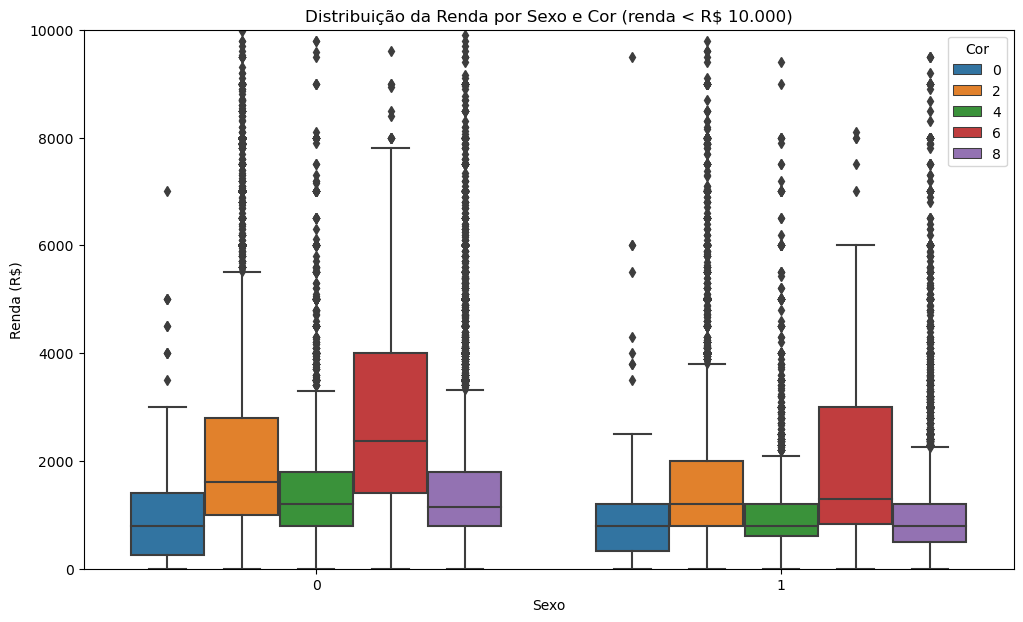

In [34]:
df_filtrado = df[df['Renda'] < 10000]

# Criar boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_filtrado, x='Sexo', y='Renda', hue='Cor')

plt.title('Distribuição da Renda por Sexo e Cor (renda < R$ 10.000)')
plt.ylabel('Renda (R$)')
plt.xlabel('Sexo')
plt.ylim(0, 10000)  # limite do eixo y para foco
plt.legend(title='Cor')
plt.show()

> ### Conclusões

Homens tendem a ter rendas mais altas que mulheres (grupo à esquerda vs. grupo à direita):

Para todas as cores, a mediana (linha dentro da caixa) é mais alta nos grupos do sexo 0 (provavelmente homens) do que nos do sexo 1 (provavelmente mulheres).

A distribuição da renda dos homens também apresenta uma cauda mais longa (mais outliers altos), indicando maior variabilidade e alguns com rendas significativamente maiores.

Pessoas com cor codificada como “6” parecem ter as maiores medianas de renda (para ambos os sexos):

A caixa para o código 6 (provavelmente brancos, segundo convenções comuns em bases brasileiras) está mais elevada que as outras.

Isso sugere que há uma diferença de renda associada à cor.

Códigos de cor “2” e “4” têm rendas medianas mais baixas:

Especialmente para o sexo 1 (provavelmente mulheres), os boxplots para cor 2 e 4 estão mais baixos que os demais.

A desigualdade de renda é visível em ambos os eixos (sexo e cor):

A combinação de sexo 1 + cor 2/4 tende a apresentar rendas mais baixas.

Já sexo 0 + cor 6 tende a ter rendas mais altas e maior variação.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [38]:
from scipy import stats
from scipy.stats import percentileofscore

# Filtrando apenas os valores de renda válidos
renda = df['Renda'].dropna()

# Calculando o percentil
percentual = percentileofscore(renda, 788, kind='weak')

print(f"Aproximadamente {percentual:.2f}% das pessoas ganham até um salário mínimo (R$ 788,00).")



Aproximadamente 28.87% das pessoas ganham até um salário mínimo (R$ 788,00).


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [37]:
renda = df['Renda'].dropna()

limite_99 = renda.quantile(0.99)

print(f"99% das pessoas ganham até aproximadamente R$ {limite_99:.2f}.")

99% das pessoas ganham até aproximadamente R$ 15000.00.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [39]:
tabela = pd.crosstab(
    index=df['Anos de Estudo'],
    columns=df['Sexo'],
    values=df['Renda'],
    aggfunc=['mean', 'median', 'max', 'std']
)

print(tabela)


                       mean               median             max          \
Sexo                      0            1       0       1       0       1   
Anos de Estudo                                                             
1                799.494638   516.201748   700.0   390.0   30000   10000   
2                895.629047   492.771987   788.0   400.0   30000    2000   
3                931.178986   529.911638   788.0   450.0   40000    4000   
4               1109.203862   546.853916   800.0   500.0   80000    3500   
5               1302.329283   704.279111  1000.0   788.0   50000   10000   
6               1338.653218   781.389776  1045.0   788.0   35000    8000   
7               1448.875419   833.732824  1200.0   788.0   25000    6000   
8               1465.497940   830.751004  1200.0   788.0   40000    9000   
9               1639.396667   933.615351  1300.0   800.0   30000   18000   
10              1508.038850   868.021700  1200.0   788.0   60000   20000   
11          

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

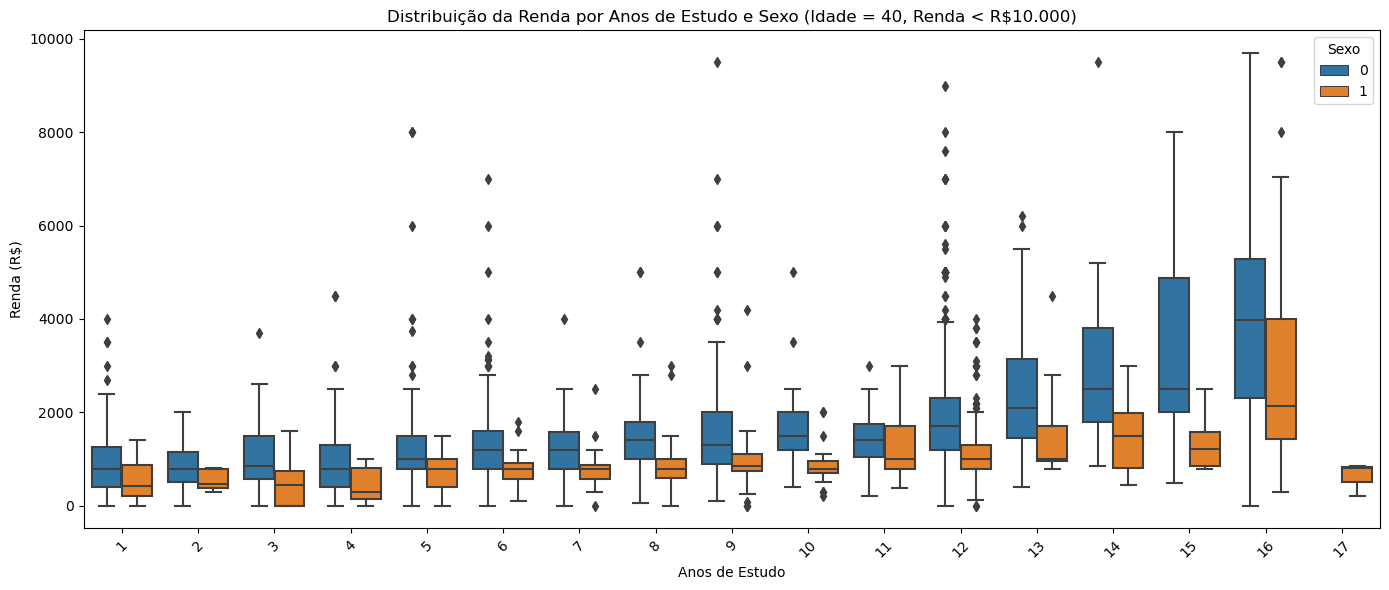

In [40]:
dados_filtrados = df.query('Renda < 10000 and Idade == 40')
plt.figure(figsize=(14, 6))
sns.boxplot(data=dados_filtrados, x='Anos de Estudo', y='Renda', hue='Sexo')
plt.title('Distribuição da Renda por Anos de Estudo e Sexo (Idade = 40, Renda < R$10.000)')
plt.ylabel('Renda (R$)')
plt.xlabel('Anos de Estudo')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ### Conclusões

A escolaridade é um forte fator de aumento de renda, mas não é suficiente para eliminar a desigualdade de gênero.

Mesmo aos 40 anos de idade (eliminando o fator "experiência"), mulheres ganham menos que homens com os mesmos anos de estudo.

A análise reforça a existência de desigualdade estrutural de gênero no mercado de trabalho brasileiro, mesmo em grupos equivalentes de idade e educação.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [41]:
estatisticas_uf = df.groupby('UF').agg({
    'Renda': ['mean', 'median', 'max', 'std']
}).sort_values(('Renda', 'mean'), ascending=False)


print(estatisticas_uf)

          Renda                             
           mean  median     max          std
UF                                          
53  4241.954722  2000.0  100000  5550.463338
35  2638.104986  1600.0   80000  3503.777366
33  2496.403168  1400.0  200000  5214.583518
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
52  1994.580794  1500.0   30000  2221.933065
16  1861.353516  1200.0   15580  2020.688632
11  1789.761223  1200.0   50000  2406.161161
14  1783.588889  1000.0   20000  2079.659238
17  1771.094946  1000.0   60000  2934.590741
26  1527.079319   900.0   50000  2389.622497
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
29  1429.645094   800.0  200000  3507.917248
15  1399.0

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

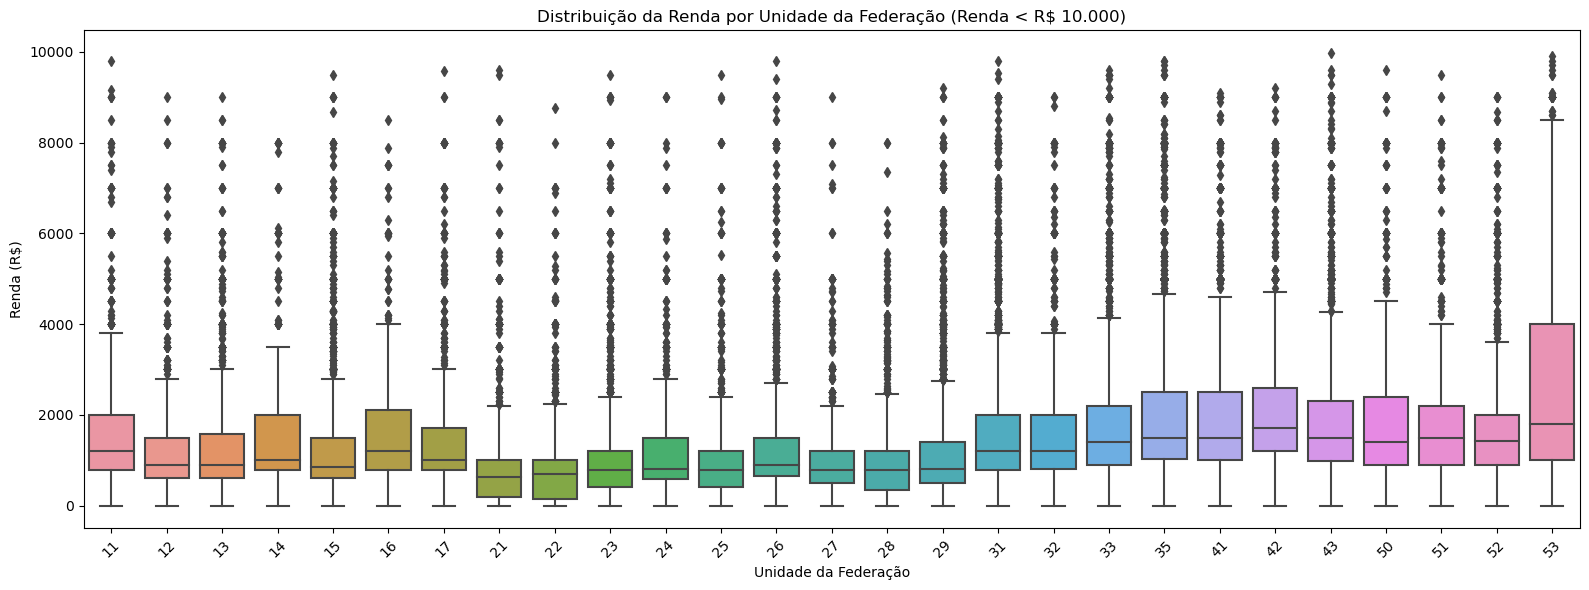

In [42]:
dados_filtrados = df[df['Renda'] < 10000]

# Criar o boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=dados_filtrados, x='UF', y='Renda')
plt.title('Distribuição da Renda por Unidade da Federação (Renda < R$ 10.000)')
plt.ylabel('Renda (R$)')
plt.xlabel('Unidade da Federação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ### Conclusões

Variação entre estados:

Estados como DF, SP e RJ costumam apresentar caixas mais altas, indicando maiores rendas medianas e amplitudes maiores.

Estados do Norte e Nordeste geralmente têm medianas mais baixas e caixas mais estreitas.

Dispersão da renda (desigualdade interna):

Estados com boxplots altos e whiskers longos (como DF e RJ) indicam alta variação salarial interna.

Isso pode refletir desde grandes oportunidades até alta desigualdade.

Outliers:

A quantidade de pontos fora dos limites superiores (outliers) mostra concentração de pessoas que ganham mais, mesmo abaixo de R$ 10.000.

Muitos outliers em estados pobres podem sugerir concentração de renda em poucos indivíduos.

## Finalizando.

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro **OpenIntro Statistics**